In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [3]:
df = pd.read_csv('tesla_close_2014_2024.csv')
df.head()

,Date,TSLA
0,2/1/2014,10.006667
1,3/1/2014,9.970667
2,6/1/2014,9.800000
3,7/1/2014,9.957333
4,8/1/2014,10.085333


In [4]:
print(df.columns.tolist())


['Date', 'TSLA']


Plot TSLA closing prices

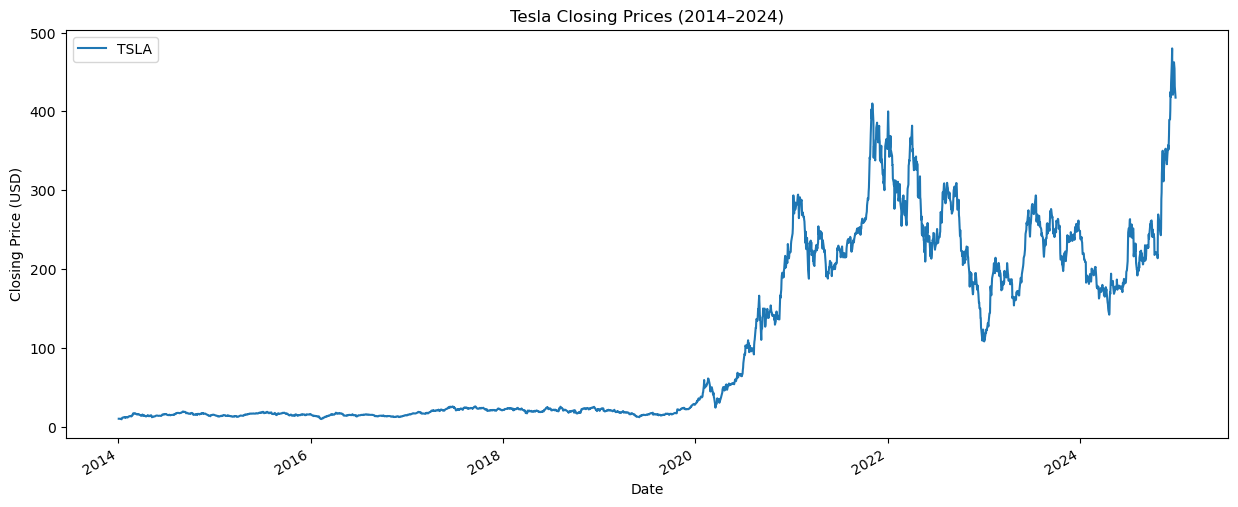

In [6]:
df.plot(figsize=(15, 6), title='Tesla Closing Prices (2014–2024)')
plt.ylabel('Closing Price (USD)')
plt.show()



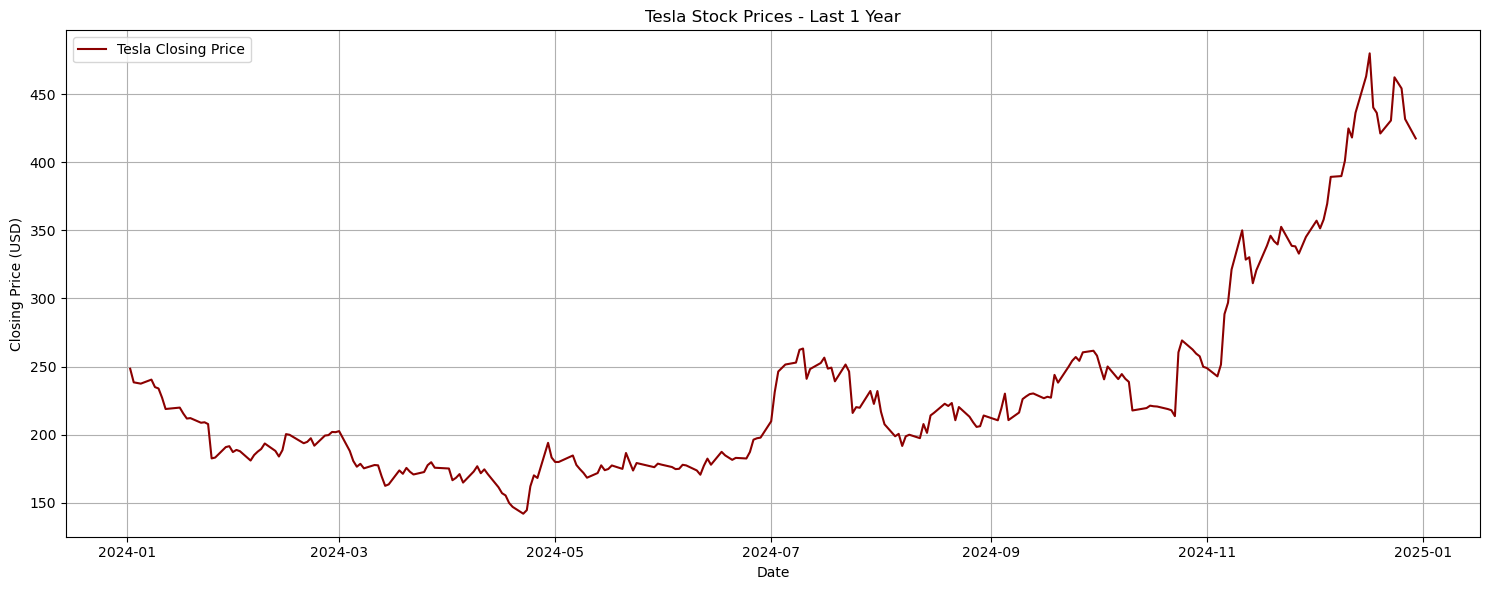

,TSLA
count,251.000000
mean,229.924821
std,70.279563
min,142.050003
25%,180.000000
50%,210.660004
75%,248.459999
max,479.859985


In [17]:
# Ensure the index is a proper DatetimeIndex
df.index = pd.to_datetime(df.index)

# Filter for the last one year of data (from the most recent date)
last_date = df.index.max()
one_year_ago = last_date - pd.Timedelta(days=365)
last_year_df = df[df.index >= one_year_ago]

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(last_year_df.index, last_year_df['TSLA'], label='Tesla Closing Price', color='darkred')
plt.title('Tesla Stock Prices - Last 1 Year')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Summary statistics for analysis
last_year_df.describe()


Calculate Log Returns

In [7]:
stock_returns = np.log(1 + df.pct_change())
stock_returns.tail()


,TSLA
Date,
2024-12-23,0.022404
2024-12-24,0.070991
2024-12-26,-0.017787
2024-12-27,-0.050745
2024-12-30,-0.033569


Plot Return Distribution

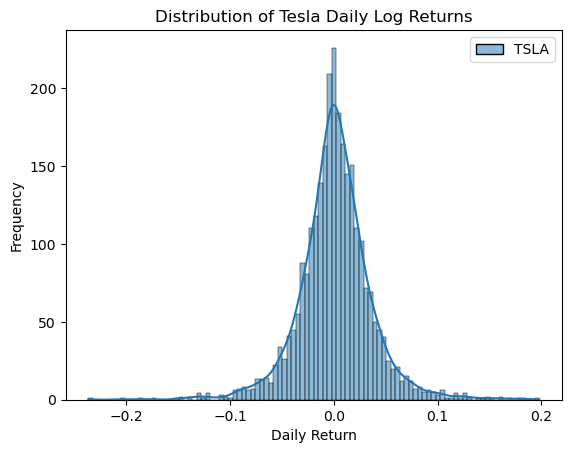

In [8]:
sns.histplot(stock_returns.iloc[1:], kde=True, bins=100)
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Distribution of Tesla Daily Log Returns")
plt.show()


Calculate Drift and Volatility

In [9]:
u = stock_returns.mean().values[0]
var = stock_returns.var().values[0]
drift = u - (0.5 * var)
stddev = stock_returns.std().values[0]


Simulate Daily Returns

In [14]:
days = 30  # Simulate for 1 trading year
iterations = 100  # Number of simulation trials

Z = norm.ppf(np.random.rand(days, iterations))
drift_matrix = np.full((days, iterations), drift)
stddev_matrix = np.full((days, iterations), stddev)

daily_returns = np.exp(drift_matrix + stddev_matrix * Z)
daily_returns

array([[0.97801835, 0.96630412, 0.98082439, ..., 1.04354822, 0.9682193 ,
        0.95846206],
       [1.00321815, 0.91262886, 1.02448853, ..., 1.0546853 , 0.98949646,
        1.04840095],
       [0.9994468 , 0.9903914 , 0.9722223 , ..., 0.96069192, 1.01545677,
        0.96744525],
       ...,
       [1.02442397, 0.98912648, 1.02893204, ..., 1.01473483, 0.96359079,
        1.03721954],
       [1.01828946, 1.03719229, 0.98751467, ..., 0.96811843, 1.05243827,
        1.01531891],
       [1.05734185, 1.02527247, 1.05650046, ..., 1.04159295, 0.99286018,
        0.9781268 ]])

Generate Price Paths

In [15]:
S0 = df['TSLA'].iloc[-1]  # Last available price
price_paths = np.zeros_like(daily_returns)
price_paths[0] = S0

for t in range(1, days):
    price_paths[t] = price_paths[t-1] * daily_returns[t]


Plot Simulation Results

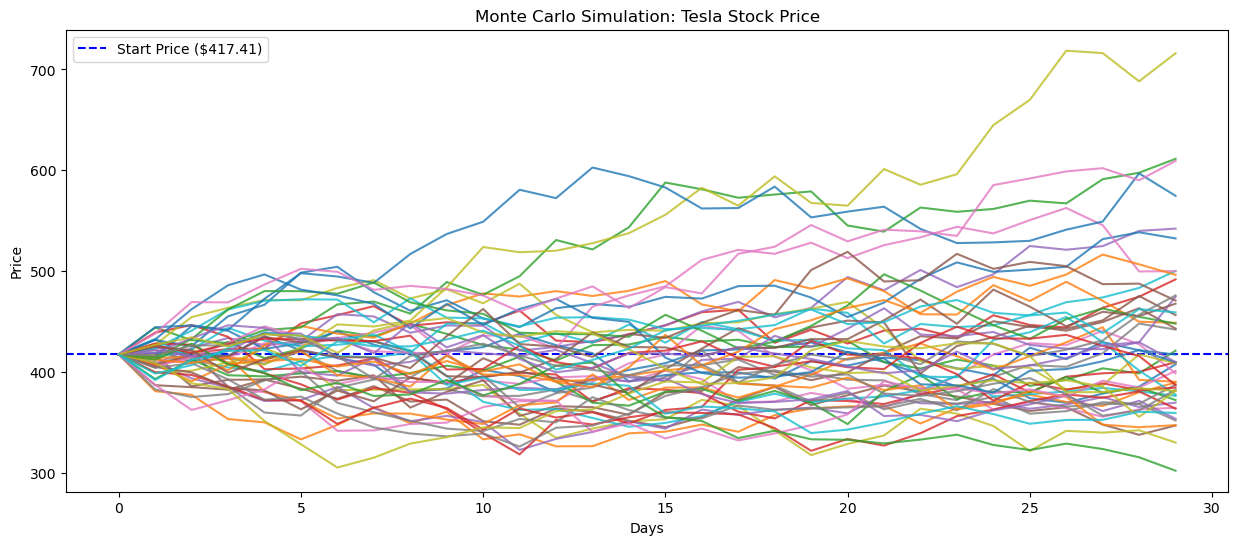

In [16]:
plt.figure(figsize=(15,6))
plt.axhline(y=S0, color='b', linestyle='--', label=f'Start Price (${S0:.2f})')
plt.plot(pd.DataFrame(price_paths).iloc[:, :50], alpha=0.8)
plt.title('Monte Carlo Simulation: Tesla Stock Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
